<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/csc349A_engineering_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Trapezoid method time: 0.1201 seconds, error: 1.33e-05
RK4 method time:       0.2477 seconds, error: 2.67e-12
Speedup (Trapezoid / RK4): 2.06x


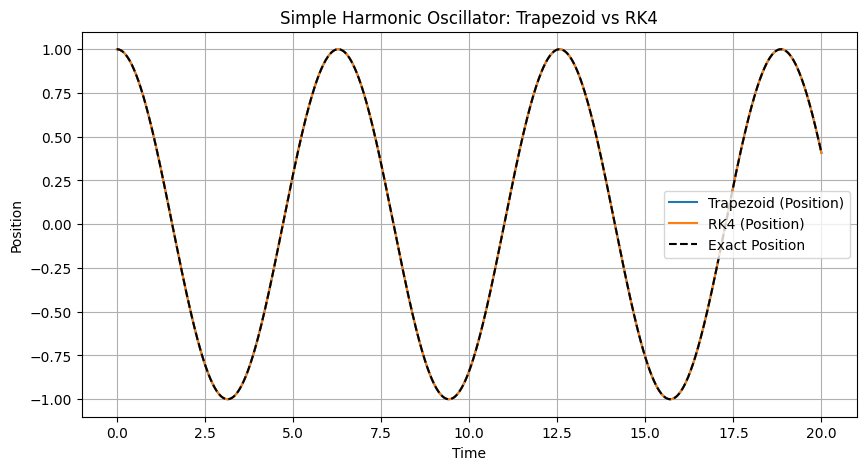

In [18]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the ODE: simple harmonic oscillator d2x/dt2 + x = 0
# Convert to first order system:
# dx/dt = v
# dv/dt = -x
def f(t, y):
    x, v = y
    dxdt = v
    dvdt = -x
    return np.array([dxdt, dvdt])

# Exact solution for comparison
def exact_solution(t):
    return np.array([np.cos(t), -np.sin(t)])  # [x, v]

# Trapezoid method step for system y' = f(t,y)
def trapezoid_step(f, t, y, h):
    y_pred = y + h * f(t, y)  # Euler predictor
    y_corr = y + (h/2) * (f(t, y) + f(t + h, y_pred))  # trapezoid corrector
    return y_corr

# RK4 step for system y' = f(t,y)
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Simulation parameters
t0, t1 = 0, 20
n_steps = 10000
h = (t1 - t0) / n_steps
t_values = np.linspace(t0, t1, n_steps + 1)

# Initial condition
y0 = np.array([1.0, 0.0])

# Solve with trapezoid method
y_trap = np.zeros((n_steps + 1, 2))
y_trap[0] = y0
start_time = time.time()
for i in range(n_steps):
    y_trap[i+1] = trapezoid_step(f, t_values[i], y_trap[i], h)
trap_time = time.time() - start_time

# Solve with RK4 method
y_rk4 = np.zeros((n_steps + 1, 2))
y_rk4[0] = y0
start_time = time.time()
for i in range(n_steps):
    y_rk4[i+1] = rk4_step(f, t_values[i], y_rk4[i], h)
rk4_time = time.time() - start_time

# Compute error against exact at final time
exact_final = exact_solution(t1)
error_trap = np.linalg.norm(y_trap[-1] - exact_final)
error_rk4 = np.linalg.norm(y_rk4[-1] - exact_final)

print(f"Trapezoid method time: {trap_time:.4f} seconds, error: {error_trap:.2e}")
print(f"RK4 method time:       {rk4_time:.4f} seconds, error: {error_rk4:.2e}")
print(f"Speedup (Trapezoid / RK4): {rk4_time / trap_time:.2f}x")

# Plot solutions and exact
plt.figure(figsize=(10,5))
plt.plot(t_values, y_trap[:,0], label='Trapezoid (Position)')
plt.plot(t_values, y_rk4[:,0], label='RK4 (Position)')
plt.plot(t_values, exact_solution(t_values)[0], 'k--', label='Exact Position')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.title('Simple Harmonic Oscillator: Trapezoid vs RK4')
plt.grid(True)
plt.show()


Final error trapezoid: 3.73181e-05
Final error RK4:       3.60904e-07


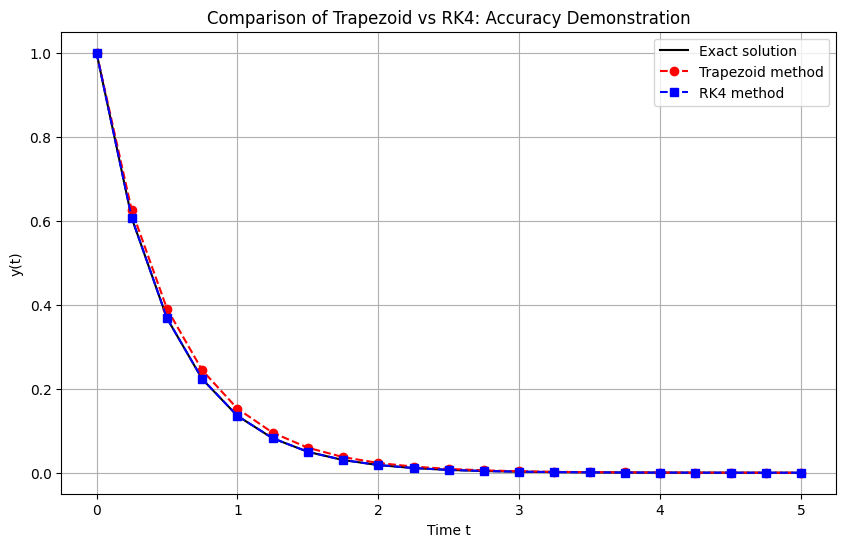

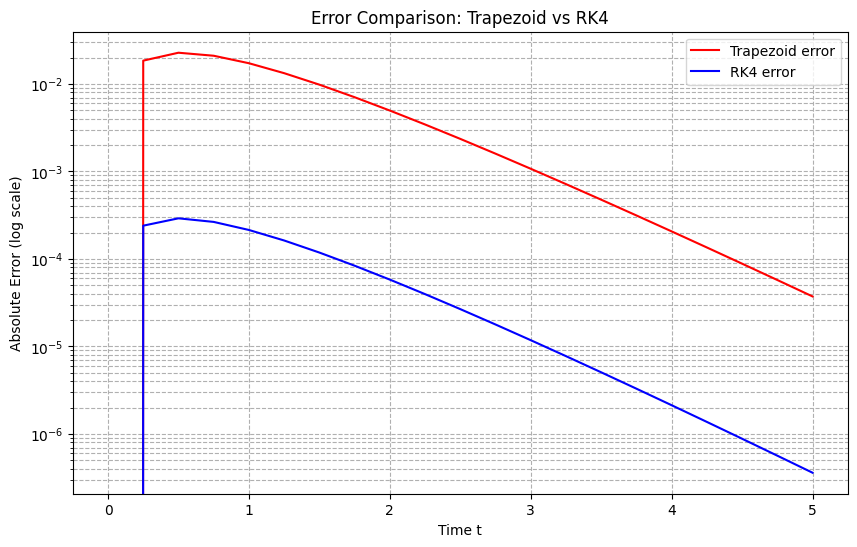

Final error trapezoid: 9.09464e-03
Final error RK4:       2.03068e-06


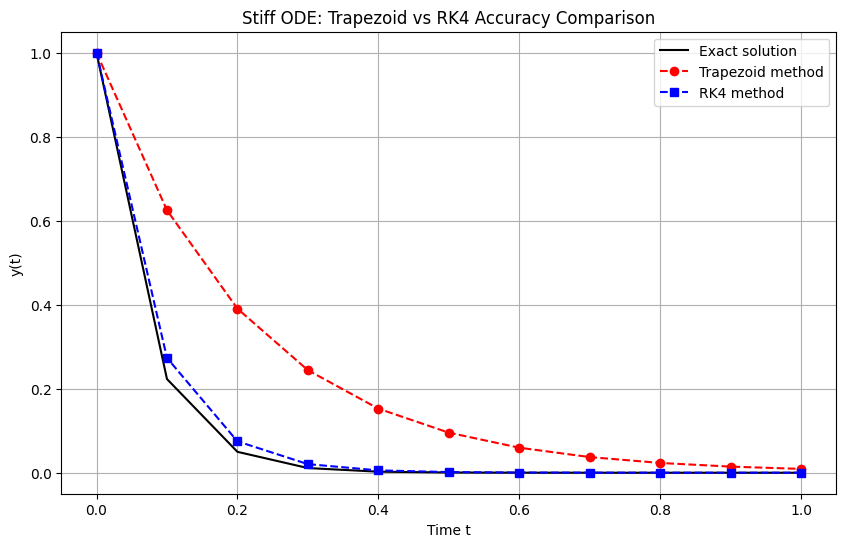

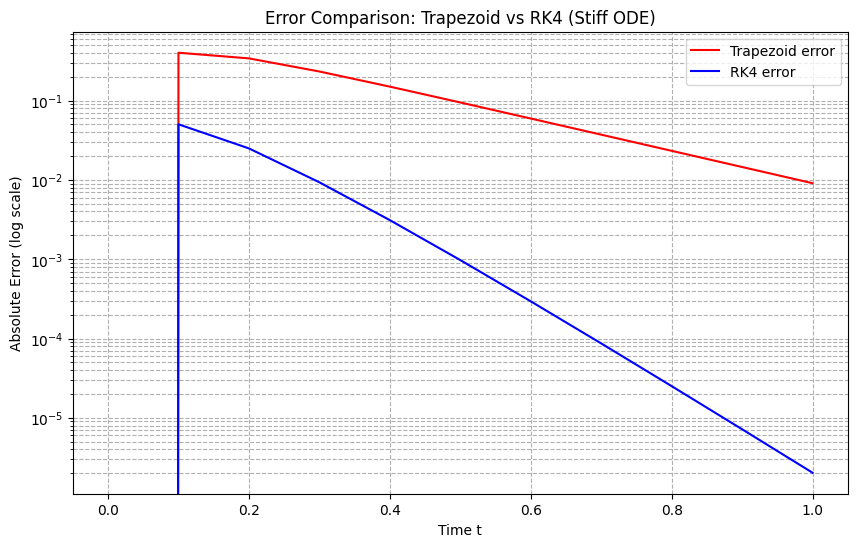

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return -15 * y

def exact_solution(t):
    return np.exp(-15 * t)

def trapezoid_step(f, t, y, h):
    y_pred = y + h * f(t, y)
    y_corr = y + (h / 2) * (f(t, y) + f(t + h, y_pred))
    return y_corr

def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Parameters
t0, t1 = 0, 1
n_steps = 10  # very coarse steps
h = (t1 - t0) / n_steps
t_values = np.linspace(t0, t1, n_steps+1)

# Initial condition
y0 = 1.0

# Arrays to store results
y_trap = np.zeros(n_steps+1)
y_rk4 = np.zeros(n_steps+1)
y_exact = exact_solution(t_values)

y_trap[0] = y0
y_rk4[0] = y0

# Solve using trapezoid and RK4
for i in range(n_steps):
    y_trap[i+1] = trapezoid_step(f, t_values[i], y_trap[i], h)
    y_rk4[i+1] = rk4_step(f, t_values[i], y_rk4[i], h)

# Compute errors
error_trap = np.abs(y_trap - y_exact)
error_rk4 = np.abs(y_rk4 - y_exact)

print(f"Final error trapezoid: {error_trap[-1]:.5e}")
print(f"Final error RK4:       {error_rk4[-1]:.5e}")

# Plot results
plt.figure(figsize=(10,6))
plt.plot(t_values, y_exact, 'k-', label='Exact solution')
plt.plot(t_values, y_trap, 'ro--', label='Trapezoid method')
plt.plot(t_values, y_rk4, 'bs--', label='RK4 method')
plt.xlabel('Time t')
plt.ylabel('y(t)')
plt.title('Stiff ODE: Trapezoid vs RK4 Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plot errors (log scale)
plt.figure(figsize=(10,6))
plt.plot(t_values, error_trap, 'r-', label='Trapezoid error')
plt.plot(t_values, error_rk4, 'b-', label='RK4 error')
plt.yscale('log')
plt.xlabel('Time t')
plt.ylabel('Absolute Error (log scale)')
plt.title('Error Comparison: Trapezoid vs RK4 (Stiff ODE)')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.show()


A **series RLC circuit** consists of a resistor (R), inductor (L), and capacitor (C) connected in series. The governing differential equation for the charge \( q(t) \) on the capacitor is:

$$
L \frac{d^2 q}{dt^2} + R \frac{dq}{dt} + \frac{1}{C} q = V(t)
$$

where $$V(t)$$ is the input voltage (e.g., step or sinusoidal).

---

## Reformulating as a System of First-Order ODEs

We rewrite the second-order ODE as two coupled first-order ODEs:

$$
\begin{cases}
\frac{dq}{dt} = i \\
\frac{di}{dt} = \frac{1}{L} \left( V(t) - R i - \frac{q}{C} \right)
\end{cases}
$$

where:
- $$ q $$ = capacitor charge (Coulombs)
- $$ i = \frac{dq}{dt} $$ = current (Amperes)

---

## Simulation Setup

- We simulate the response of the circuit to a step input voltage \(V(t) = V_0\) for \(t \geq 0\).
- Use the **4th-order Runge–Kutta method (RK4)** to numerically integrate the system.
- Initial conditions: zero charge and zero current at \(t=0\).

---

## Results

- The RK4 integrator calculates charge and current at discrete time steps.
- The voltage across the capacitor $$V_c = \frac{q}{C}$$ and current \(i\) are plotted over time.
- You can observe transient oscillations caused by the interplay of inductance and capacitance, which gradually dampen due to resistance.

---

Feel free to modify the input voltage, circuit parameters, or integration parameters to explore different behaviors!

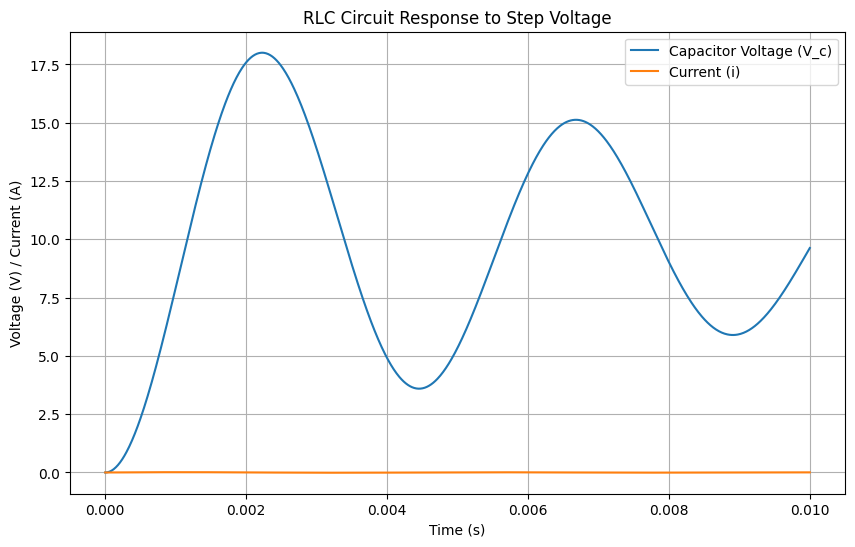

In [4]:
# Circuit parameters
R = 100      # Resistance in ohms
L = 0.5      # Inductance in henries
C = 1e-6     # Capacitance in farads
V0 = 10      # Step voltage in volts

# Time setup
t0, t1, n_steps = 0, 0.01, 1000
t = np.linspace(t0, t1, n_steps)
h = (t1 - t0) / (n_steps - 1)

# Define the system of ODEs
# y = [q, i] where q = charge, i = current
def f(t, y):
    q, i = y
    dqdt = i
    didt = (V0 - R * i - q / C) / L
    return np.array([dqdt, didt])

# RK4 integrator
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h*k1/2)
    k3 = f(t + h/2, y + h*k2/2)
    k4 = f(t + h, y + h*k3)
    return y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Initialize solution array
y = np.zeros((n_steps, 2))
y[0] = [0, 0]  # Initial charge and current

# Integrate over time
for i in range(n_steps - 1):
    y[i+1] = rk4_step(f, t[i], y[i], h)

q = y[:, 0]  # charge
i = y[:, 1]  # current
v_c = q / C  # voltage across capacitor

# Plot results
plt.figure(figsize=(10,6))
plt.plot(t, v_c, label='Capacitor Voltage (V_c)')
plt.plot(t, i, label='Current (i)')
plt.title('RLC Circuit Response to Step Voltage')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V) / Current (A)')
plt.legend()
plt.grid(True)
plt.show()

# Application of the Trapezoid Rule to Mechanical Engineering: Velocity and Displacement Estimation

---

## Problem Overview

Suppose you have acceleration measurements \(a(t)\) over time from a sensor attached to a vibrating machine part. The goal is to estimate the velocity \(v(t)\) and displacement \(x(t)\) of the part.

---

## Mathematical Background

- Velocity is the integral of acceleration:  
  $$
  v(t) = \int a(t) \, dt
  $$

- Displacement is the integral of velocity:  
  $$
  x(t) = \int v(t) \, dt
  $$

The **trapezoid rule** is a numerical integration method well suited for this task.

---

## Implementation Details

- The trapezoid rule approximates the integral by summing trapezoids under the curve.
- The integration is performed sequentially:
  - Integrate acceleration to get velocity.
  - Integrate velocity to get displacement.

---

## Summary

- Acceleration data is often obtained from sensors in mechanical systems.
- Using the trapezoid rule allows us to estimate velocity and displacement from this data.
- This method is widely applicable in vibration analysis, condition monitoring, and motion tracking.

---

Feel free to explore modifying the input acceleration data or sampling frequency to see their effects on the velocity and displacement estimates.

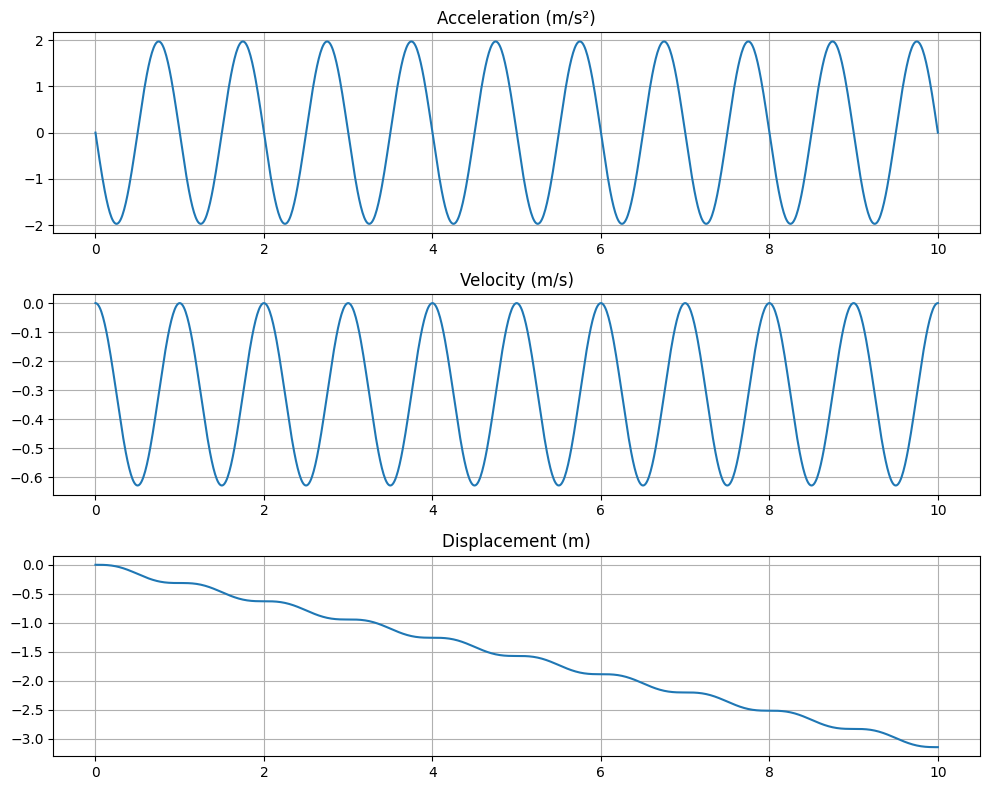

In [5]:
# Sample time vector (seconds)
t = np.linspace(0, 10, 1001)  # 0 to 10 seconds, 1001 points
dt = t[1] - t[0]

# Simulated acceleration data: simple harmonic motion
# a(t) = -A * omega^2 * sin(omega * t)
A = 0.05  # amplitude (meters)
f = 1.0   # frequency (Hz)
omega = 2 * np.pi * f
a = -A * omega**2 * np.sin(omega * t)

# Integrate acceleration to get velocity using trapezoid rule
v = np.zeros_like(a)
for i in range(1, len(t)):
    v[i] = v[i-1] + 0.5 * (a[i] + a[i-1]) * dt

# Integrate velocity to get displacement using trapezoid rule
x = np.zeros_like(v)
for i in range(1, len(t)):
    x[i] = x[i-1] + 0.5 * (v[i] + v[i-1]) * dt

# Plot acceleration, velocity, and displacement
plt.figure(figsize=(10, 8))

plt.subplot(3,1,1)
plt.plot(t, a)
plt.title('Acceleration (m/s²)')
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(t, v)
plt.title('Velocity (m/s)')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(t, x)
plt.title('Displacement (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Application of the Trapezoid Rule to Civil Engineering: Beam Displacement Estimation

---

## Problem Overview

In civil engineering, monitoring the displacement of structures like beams, bridges, or buildings is crucial for safety and maintenance.

Suppose you have acceleration or strain rate data measured over time at a critical point of a beam under dynamic loading. The goal is to estimate the beam’s velocity and displacement from these measurements.

---

## Mathematical Background

- Velocity is the integral of acceleration (or strain rate):  
  $$
  v(t) = \int a(t) \, dt
  $$

- Displacement is the integral of velocity:  
  $$
  x(t) = \int v(t) \, dt
  $$

The **trapezoid rule** numerically approximates these integrals from discrete data points.

---

## Implementation Details

- The trapezoid rule computes the area under the curve by approximating it with trapezoids.
- We apply it twice:
  - First, integrate acceleration/strain rate to get velocity.
  - Then, integrate velocity to get displacement.

---

## Summary

- This numerical approach enables estimation of displacement without direct measurement.
- Useful in structural health monitoring, vibration analysis, and seismic response studies.
- Can be applied to real sensor data to assess structural performance dynamically.

---

Try experimenting with different loading scenarios, sampling rates, or noise levels to understand their impact on the displacement estimate.

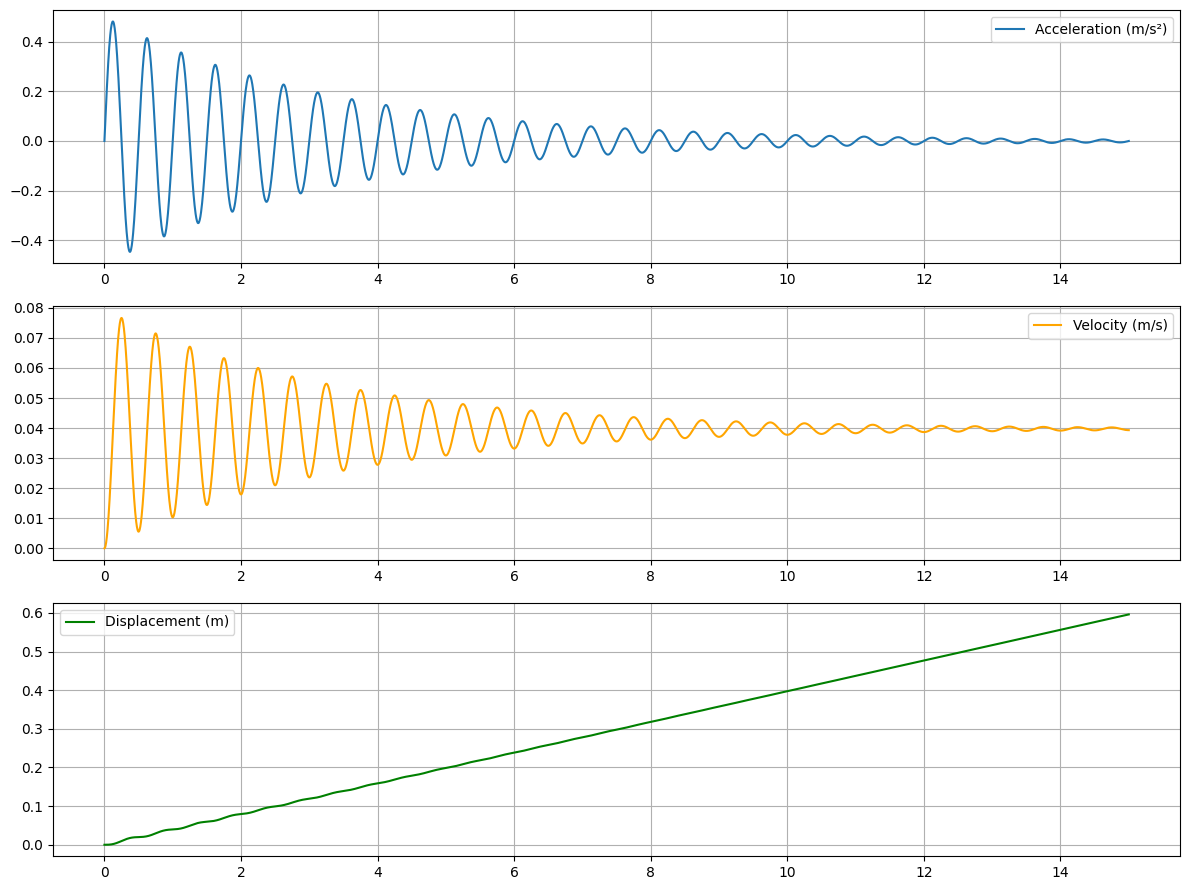

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector: simulate 15 seconds at 200 Hz sampling rate
fs = 200
t = np.linspace(0, 15, 15 * fs + 1)
dt = t[1] - t[0]

# Simulated acceleration data: a burst of dynamic loading
# e.g., sinusoidal acceleration with exponential decay
freq = 2  # Hz
a = 0.5 * np.sin(2 * np.pi * freq * t) * np.exp(-0.3 * t)

# Integrate acceleration to get velocity using trapezoid rule
v = np.zeros_like(a)
for i in range(1, len(t)):
    v[i] = v[i-1] + 0.5 * (a[i] + a[i-1]) * dt

# Integrate velocity to get displacement using trapezoid rule
x = np.zeros_like(v)
for i in range(1, len(t)):
    x[i] = x[i-1] + 0.5 * (v[i] + v[i-1]) * dt

# Plot acceleration, velocity, and displacement
plt.figure(figsize=(12, 9))

plt.subplot(3, 1, 1)
plt.plot(t, a, label='Acceleration (m/s²)')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, v, label='Velocity (m/s)', color='orange')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, x, label='Displacement (m)', color='green')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Application of the Trapezoid Rule to Biomedical Engineering: Estimating Blood Volume Flow

---

## Problem Overview

In biomedical engineering, estimating blood flow volume through vessels is essential for diagnosing cardiovascular health and monitoring treatments.

Velocity data can be obtained non-invasively from Doppler ultrasound or MRI, but this data is discrete and needs numerical integration to compute volume flow.

---

## Mathematical Background

Blood flow volume $Q(t)$ through a vessel is calculated by integrating velocity $v(t)$ over time and multiplying by the vessel’s cross-sectional area $A$:

$$
Q(t) = A \int v(t) \, dt
$$

Since velocity data is discrete, the **trapezoid rule** is used for numerical integration.

---

## Implementation Details

- Velocity measurements represent pulsatile blood flow, often resembling the heartbeat pattern.
- The trapezoid rule approximates the integral by summing trapezoids under the velocity curve.
- Multiplying the integral by the cross-sectional area converts velocity integral into volume flow.

---

## Summary

- This numerical approach allows clinicians and researchers to estimate cumulative blood volume flow from discrete velocity data.
- Useful for cardiovascular diagnostics, blood flow monitoring, and treatment assessment.
- The approach can be extended to real clinical data sets and other physiological flow measurements.

---

Feel free to experiment with vessel size, velocity profile shapes, or sampling rates to simulate different conditions.


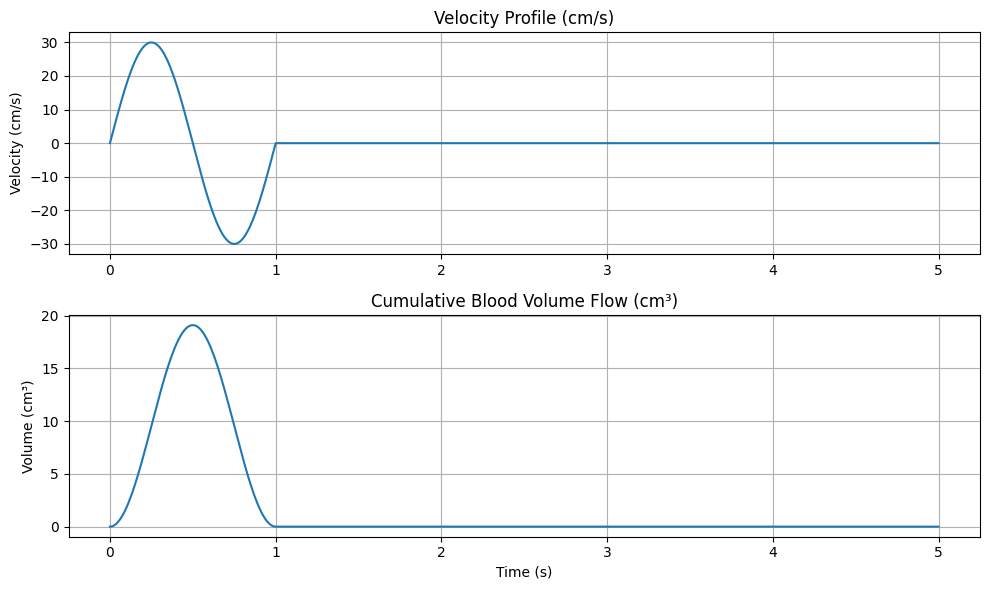

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Time vector (seconds)
t = np.linspace(0, 5, 501)  # 0 to 5 seconds, 501 points
dt = t[1] - t[0]

# Simulated velocity profile (cm/s) - pulsatile flow resembling heartbeat
heart_rate = 60 / 60  # 1 Hz (60 beats per minute)
velocity = 30 * np.sin(2 * np.pi * heart_rate * t) * (t < 1)  # only flow during first second

# Vessel cross-sectional area (cm^2)
A = 2.0

# Integrate velocity to get volume flow (cm^3)
volume_flow = np.zeros_like(velocity)
for i in range(1, len(t)):
    volume_flow[i] = volume_flow[i-1] + 0.5 * (velocity[i] + velocity[i-1]) * dt * A

# Plot velocity and cumulative volume flow
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, velocity)
plt.title('Velocity Profile (cm/s)')
plt.ylabel('Velocity (cm/s)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, volume_flow)
plt.title('Cumulative Blood Volume Flow (cm³)')
plt.ylabel('Volume (cm³)')
plt.xlabel('Time (s)')
plt.grid(True)

plt.tight_layout()
plt.show()


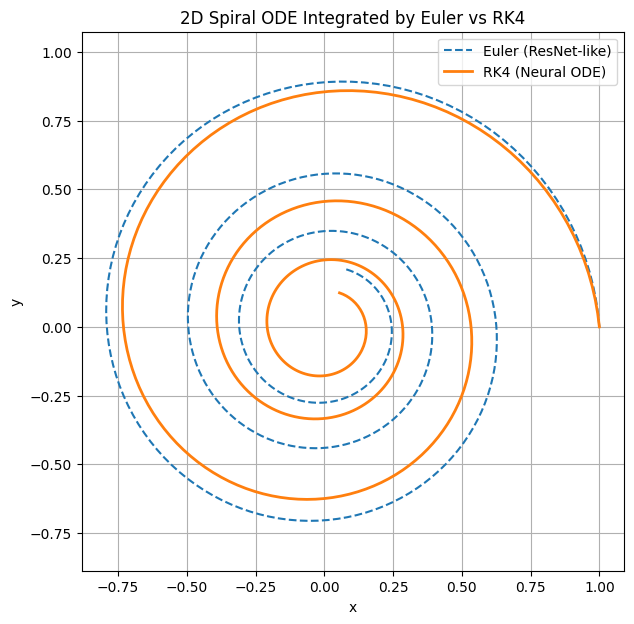

In [3]:



# Define the spiral ODE system: dy/dt = f(t, y)
def f(t, y):
    x, y_ = y
    dxdt = -y_ - 0.1 * x
    dydt = x - 0.1 * y_
    return np.array([dxdt, dydt])

# Time setup
t0, t1, n_steps = 0, 20, 400
t = np.linspace(t0, t1, n_steps)
h = (t1 - t0) / (n_steps - 1)

# Initialize arrays
y_euler = np.zeros((n_steps, 2))
y_rk4 = np.zeros((n_steps, 2))
y0 = np.array([1.0, 0.0])
y_euler[0] = y_rk4[0] = y0

# Integrate using Euler and RK4
for i in range(n_steps - 1):
    # Euler step
    y_euler[i+1] = y_euler[i] + h * f(t[i], y_euler[i])

    # RK4 step
    k1 = f(t[i], y_rk4[i])
    k2 = f(t[i] + h/2, y_rk4[i] + h*k1/2)
    k3 = f(t[i] + h/2, y_rk4[i] + h*k2/2)
    k4 = f(t[i] + h, y_rk4[i] + h*k3)
    y_rk4[i+1] = y_rk4[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# Plot trajectories
plt.figure(figsize=(7,7))
plt.plot(y_euler[:,0], y_euler[:,1], '--', label="Euler (ResNet-like)")
plt.plot(y_rk4[:,0], y_rk4[:,1], label="RK4 (Neural ODE)", linewidth=2)
plt.title("2D Spiral ODE Integrated by Euler vs RK4")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.axis("equal")
plt.grid(True)
plt.show()









/tmp/ipython-input-3481870053.py:17: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  Q = 2 * np.pi * np.trapz(integrand, r)


Volumetric flow rate Q = 0.0079 m^3/s


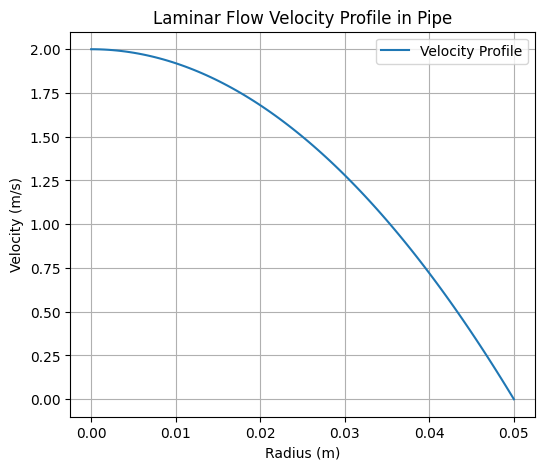

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Pipe parameters
R = 0.05  # pipe radius (m)

# Radial positions (m) from center to pipe wall
r = np.linspace(0, R, 100)

# Velocity profile (laminar flow, parabolic)
# v(r) = vmax * (1 - (r/R)^2)
vmax = 2.0  # max velocity at center (m/s)
v = vmax * (1 - (r / R)**2)

# Calculate volumetric flow rate Q = 2*pi * ∫ v(r)*r dr using trapezoid rule
integrand = v * r
Q = 2 * np.pi * np.trapz(integrand, r)

print(f"Volumetric flow rate Q = {Q:.4f} m^3/s")

# Plot velocity profile
plt.figure(figsize=(6, 5))
plt.plot(r, v, label='Velocity Profile')
plt.xlabel('Radius (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Laminar Flow Velocity Profile in Pipe')
plt.grid(True)
plt.legend()
plt.show()


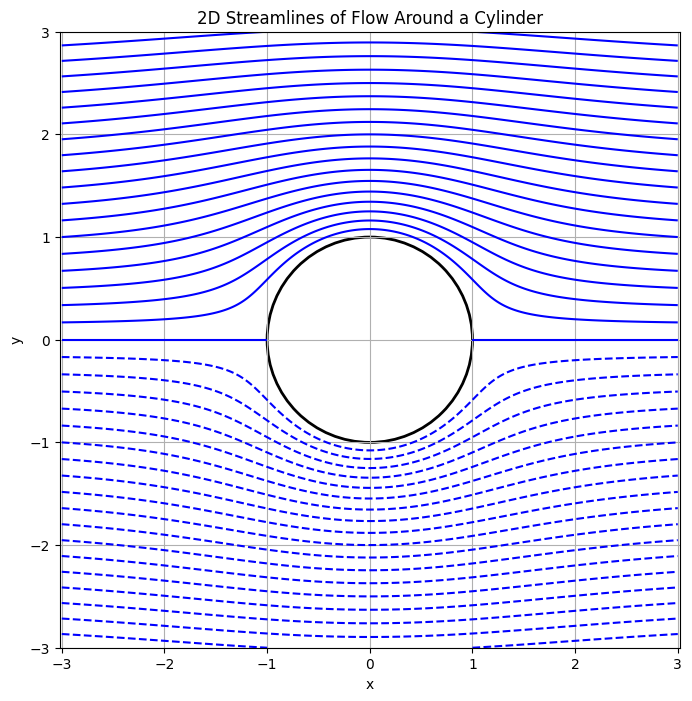

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Flow parameters
U_inf = 1.0  # uniform flow speed
R = 1.0      # cylinder radius

# Create a grid of points
x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

# Potential flow: Uniform flow + doublet (cylinder)
# Stream function for uniform flow
psi_uniform = U_inf * Y

# Stream function for doublet
psi_doublet = - U_inf * R**2 * Y / (X**2 + Y**2)

# Total stream function
psi = psi_uniform + psi_doublet

# Mask inside cylinder
psi[r < R] = np.nan

# Plot streamlines
plt.figure(figsize=(8, 8))
plt.contour(X, Y, psi, levels=50, colors='b')
circle = plt.Circle((0, 0), R, color='k', fill=False, linewidth=2)
plt.gca().add_artist(circle)

plt.title('2D Streamlines of Flow Around a Cylinder')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.grid(True)
plt.show()


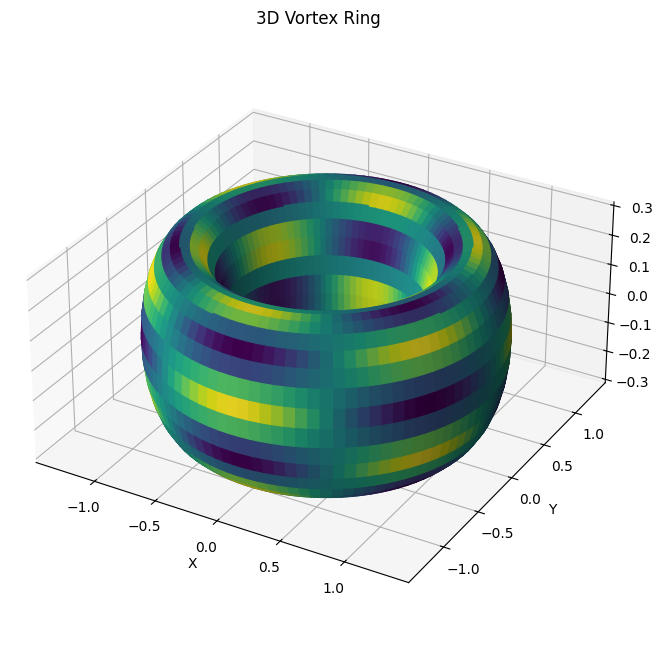

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters for the vortex ring
R = 1.0  # ring radius
r = 0.3  # tube radius
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 30)

# Create meshgrid
Theta, Phi = np.meshgrid(theta, phi)

# Parametric equations for vortex ring surface
X = (R + r * np.cos(Phi)) * np.cos(Theta)
Y = (R + r * np.cos(Phi)) * np.sin(Theta)
Z = r * np.sin(Phi)

# Vortex strength (for coloring)
vortex_strength = np.sin(3 * Theta) * np.cos(5 * Phi)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, facecolors=plt.cm.viridis((vortex_strength - vortex_strength.min()) / (vortex_strength.max() - vortex_strength.min())), rstride=1, cstride=1)

ax.set_title('3D Vortex Ring')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([1,1,0.5])  # aspect ratio

plt.show()


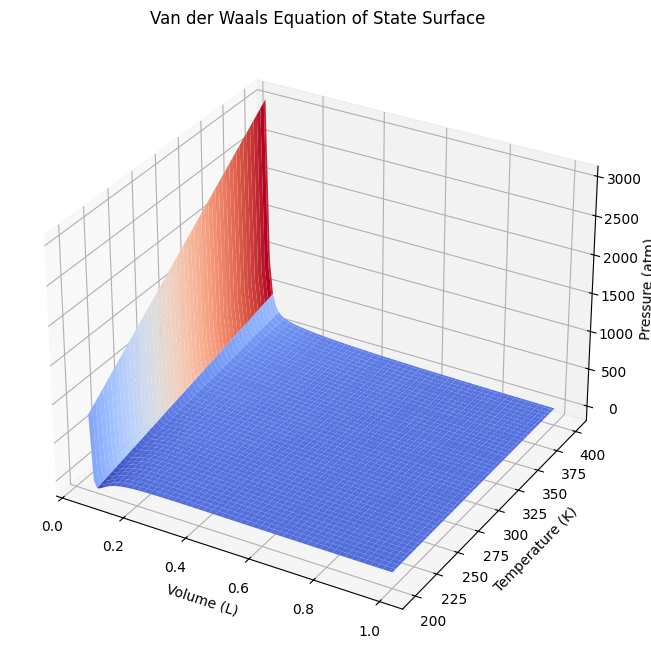

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants for CO2 (approximate)
a = 3.59      # L^2 atm / mol^2
b = 0.0427    # L / mol
R = 0.0821    # L atm / mol K
n = 1.0       # moles

# Volume range (L)
V = np.linspace(0.05, 1.0, 100)
# Temperature range (K)
T = np.linspace(200, 400, 100)

# Create meshgrid
V_grid, T_grid = np.meshgrid(V, T)

# Calculate Pressure using Van der Waals equation
P = (n * R * T_grid) / (V_grid - n * b) - a * n**2 / (V_grid**2)

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(V_grid, T_grid, P, cmap='coolwarm', edgecolor='none')

ax.set_xlabel('Volume (L)')
ax.set_ylabel('Temperature (K)')
ax.set_zlabel('Pressure (atm)')
ax.set_title('Van der Waals Equation of State Surface')

plt.show()


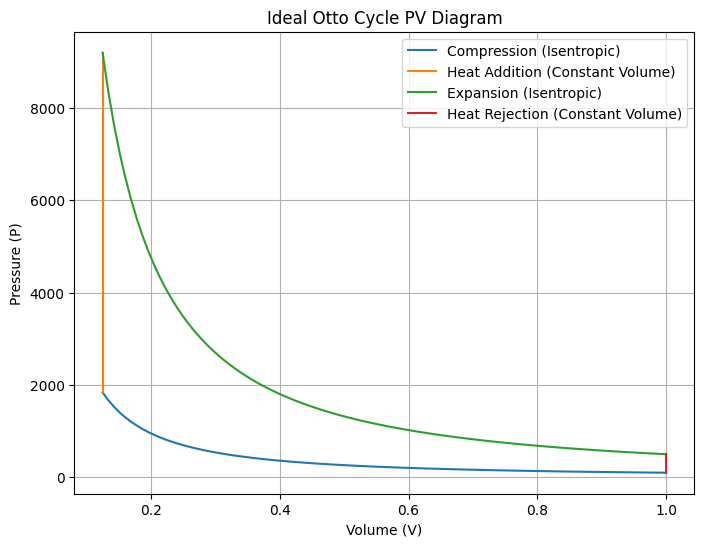

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
gamma = 1.4  # specific heat ratio for air
r = 8        # compression ratio

# Define volumes at key points
V1 = 1.0  # initial volume
V2 = V1 / r  # volume after compression

# Define temperatures (arbitrary for illustration)
T1 = 300  # initial temperature (K)
T3 = 1500 # max temperature after combustion

# Calculate pressures at key points using isentropic relations
P1 = 100  # initial pressure (kPa)
P2 = P1 * (r)**gamma
P3 = P2 * T3 / T1
P4 = P3 * (1 / r)**gamma

# Generate volume arrays for compression and expansion
V_comp = np.linspace(V1, V2, 100)
V_exp = np.linspace(V2, V1, 100)

# Calculate pressure during compression (isentropic)
P_comp = P1 * (V1 / V_comp)**gamma

# Pressure during heat addition (constant volume)
V_const1 = np.full(100, V2)
P_heat_add = np.linspace(P2, P3, 100)

# Pressure during expansion (isentropic)
P_exp = P3 * (V2 / V_exp)**gamma

# Pressure during heat rejection (constant volume)
V_const2 = np.full(100, V1)
P_heat_rej = np.linspace(P4, P1, 100)

# Plot PV diagram
plt.figure(figsize=(8,6))
plt.plot(V_comp, P_comp, label='Compression (Isentropic)')
plt.plot(V_const1, P_heat_add, label='Heat Addition (Constant Volume)')
plt.plot(V_exp, P_exp, label='Expansion (Isentropic)')
plt.plot(V_const2, P_heat_rej, label='Heat Rejection (Constant Volume)')

plt.xlabel('Volume (V)')
plt.ylabel('Pressure (P)')
plt.title('Ideal Otto Cycle PV Diagram')
plt.legend()
plt.grid(True)
plt.show()
